# Well Depth Analysis 
In this file we will use daily wells depth - hydrodata downloaded from the datasets of the Princeton University. Primarily we will create two tables one containg the info about the location of the wells, the source of information and the depth of the well.
The second table we create will contain the average depth of the wells for each year and the catergory of the well based on the average depths calculated for each year.

In [36]:
#importing the important libraries 
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import r2_score


## Well information table 
This table contains the following information:
  1. Well ID (site_id)
  2. Source (Hydrodata)
  3. Agency – agency that runs well
  4. Latitude
  5. Longitude
  6. State
  7. well_depth_va
  8. hole_depth_va


 

In [37]:
#reading the meta data for the wells depth data - it contains 60 features and 3634 instances of wells.
df = pd.read_csv("metadata_daily_avg_1984_present_minobsv40 (1).csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3634 entries, 0 to 3633
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   site_id                     3634 non-null   int64  
 1   site_type                   3634 non-null   object 
 2   agency                      3634 non-null   object 
 3   site_name                   3634 non-null   object 
 4   site_id_agency              3634 non-null   int64  
 5   site_query_url              3634 non-null   object 
 6   date_metadata_last_updated  3634 non-null   object 
 7   latitude                    3634 non-null   float64
 8   longitude                   3634 non-null   float64
 9   state                       3634 non-null   object 
 10  huc                         3634 non-null   int64  
 11  tz_cd                       3634 non-null   object 
 12  doi                         0 non-null      float64
 13  observation_id              3634 

Exploration of the data

In [38]:
df.head(3)

,site_id,site_type,agency,site_name,site_id_agency,site_query_url,date_metadata_last_updated,latitude,longitude,state,...,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no,conus1_x,conus1_y,conus2_x,conus2_y
0,272310098160200,groundwater well,USGS,JB-84-38-902 (Duval County CRN),272310098160200,https://waterservices.usgs.gov/nwis/site/?form...,2023-03-08,27.386426,-98.267507,TX,...,121GOLD,U,310.00,NaN,NaN,NaN,NaN,NaN,2081.0,284.0
1,283853097290701,groundwater well,USGS,KP-79-21-706 (Goliad 2 - Deep),283853097290701,https://waterservices.usgs.gov/nwis/site/?form...,2023-03-08,28.648056,-97.485278,TX,...,121GOLD,C,243.00,243.00,O,8653-CA601,NaN,NaN,2160.0,425.0
2,283939097293201,groundwater well,USGS,KP-79-21-705 (Goliad 1),283939097293201,https://waterservices.usgs.gov/nwis/site/?form...,2023-03-08,28.660833,-97.492222,TX,...,121GOLD,C,56.27,56.27,S,8653-CA601,NaN,NaN,2159.0,427.0


In [39]:
#type of sites in the data - it is the data primarily related to groundwater data 
df.site_type.unique()

array(['groundwater well'], dtype=object)

In [40]:
#the agency types - the agency that runs these wells is USGS
df.agency.unique()

array(['USGS'], dtype=object)

In [41]:
#we form a new dataset extracting the information that is relevant to our analysis for creating the first table.
selected_columns = ["site_id", "agency", "latitude", "longitude", "state", "well_depth_va","hole_depth_va"]
wells1 = df[selected_columns]
wells1.head()

,site_id,agency,latitude,longitude,state,well_depth_va,hole_depth_va
0,272310098160200,USGS,27.386426,-98.267507,TX,310.00,NaN
1,283853097290701,USGS,28.648056,-97.485278,TX,243.00,243.00
2,283939097293201,USGS,28.660833,-97.492222,TX,56.27,56.27
3,290643097575901,USGS,29.111861,-97.966511,TX,132.00,132.00
4,290818098163201,USGS,29.138361,-98.275444,TX,983.00,983.00


We will now visualise the number of wells and the depth of the well and the depth of the holes.

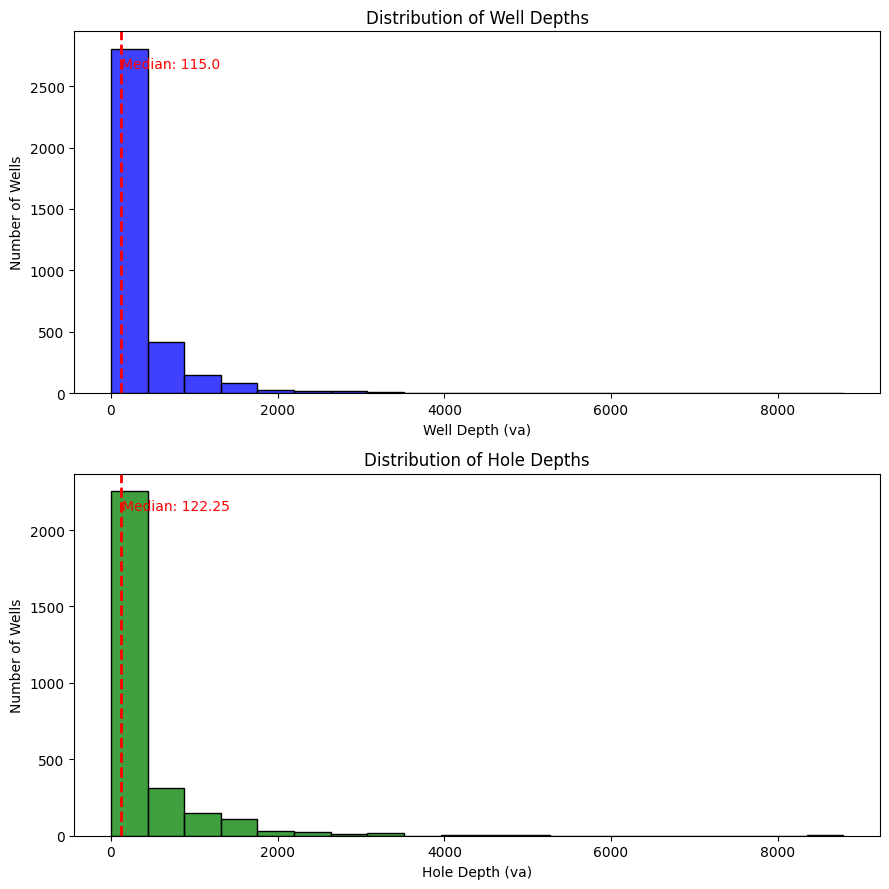

In [42]:
# Create the "Plots" directory if it doesn't exist
plot_dir = "Plots"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)


#calculate the median values
median_well_depth = wells1['well_depth_va'].median()
median_hole_depth = wells1['hole_depth_va'].median()

#set up the matplotlib figure
fig, axes = plt.subplots(2, 1, figsize=(9, 9))

#plot for well depth
sns.histplot(wells1['well_depth_va'], kde=False, color='blue', bins=20, ax=axes[0])
axes[0].axvline(median_well_depth, color='red', linestyle='dashed', linewidth=2)
axes[0].text(median_well_depth + 5, axes[0].get_ylim()[1] * 0.9, f'Median: {median_well_depth}', color = 'red')
axes[0].set_title('Distribution of Well Depths')
axes[0].set_xlabel('Well Depth (va)')
axes[0].set_ylabel('Number of Wells')

#plot for hole depth
sns.histplot(wells1['hole_depth_va'], kde=False, color='green', bins=20, ax=axes[1])
axes[1].axvline(median_hole_depth, color='red', linestyle='dashed', linewidth=2)
axes[1].text(median_hole_depth + 5, axes[1].get_ylim()[1] * 0.9, f'Median: {median_hole_depth}', color = 'red')
axes[1].set_title('Distribution of Hole Depths')
axes[1].set_xlabel('Hole Depth (va)')
axes[1].set_ylabel('Number of Wells')

plt.savefig(os.path.join(plot_dir, 'hole_depth_distribution.png'))  # Save the plot

plt.tight_layout()
plt.show()

In [43]:
#adding another column that contains the source of the dataset - we knew it was hydrodata
wells1['Source'] = 'HydroData'

/var/folders/34/60ygr19n67b8trp40jqd0hjw0000gn/T/ipykernel_64559/1024088042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wells1['Source'] = 'HydroData'


In [44]:
#rearranging the columns of the dataframe
wells1 = wells1[['site_id', 'Source', 'agency', 'latitude', 'longitude', 'state', 'well_depth_va', 'hole_depth_va']]
wells1.head()

,site_id,Source,agency,latitude,longitude,state,well_depth_va,hole_depth_va
0,272310098160200,HydroData,USGS,27.386426,-98.267507,TX,310.00,NaN
1,283853097290701,HydroData,USGS,28.648056,-97.485278,TX,243.00,243.00
2,283939097293201,HydroData,USGS,28.660833,-97.492222,TX,56.27,56.27
3,290643097575901,HydroData,USGS,29.111861,-97.966511,TX,132.00,132.00
4,290818098163201,HydroData,USGS,29.138361,-98.275444,TX,983.00,983.00


In [45]:
#store this table to a csv file and store it to the directory 
wells1.to_csv("Wells1.csv")

--------------


Now we move to create the next table that contains the average depths for the wells each year and categorisation of the wells. 
The table contains the following information:
1. 
2.
3.


 We actually move on to create two tables:
 1. Containing the yearly average depths 
 2. Containg the yearly minimum depths
      

     

In [46]:
#reading the dataset - it contains daily average depth for 14626 and instances of 3634 wells 
data = pd.read_csv("wtd_obsv_daily_avg_1984_present_minobsv40 (1).csv.crdownload")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3634 entries, 0 to 3633
Columns: 14626 entries, site_id to num_obs
dtypes: float64(14624), int64(2)
memory usage: 405.5 MB


Lets explore the data and find the minimum and the average yearly depths.

In [47]:
data.head()

,site_id,1983-10-01,1983-10-02,1983-10-03,1983-10-04,1983-10-05,1983-10-06,1983-10-07,1983-10-08,1983-10-09,...,2023-10-06,2023-10-07,2023-10-08,2023-10-09,2023-10-10,2023-10-11,2023-10-12,2023-10-13,2023-10-14,num_obs
0,272310098160200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.264128,16.273272,16.267176,16.24584,16.242792,16.236696,16.242792,16.273272,16.303752,766
1,283853097290701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620
2,283939097293201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,780
3,290643097575901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279
4,290818098163201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,555


In [48]:
#move column 'num_obs' - this indicated the number of observations that are present for the given well.
col = data.pop('num_obs')
data.insert(1, col.name, col)
data.head()

,site_id,num_obs,1983-10-01,1983-10-02,1983-10-03,1983-10-04,1983-10-05,1983-10-06,1983-10-07,1983-10-08,...,2023-10-05,2023-10-06,2023-10-07,2023-10-08,2023-10-09,2023-10-10,2023-10-11,2023-10-12,2023-10-13,2023-10-14
0,272310098160200,766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.254984,16.264128,16.273272,16.267176,16.24584,16.242792,16.236696,16.242792,16.273272,16.303752
1,283853097290701,620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,283939097293201,780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,290643097575901,279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,290818098163201,555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
#exclude 'site_id' and 'num_obs' columns - to perform the grouping and finiding the yearly values 
data_filtered = data.drop(columns=['site_id', 'num_obs'])
columns = data[['site_id', 'num_obs']] 
#convert columns to datetime
data_filtered.columns = pd.to_datetime(data_filtered.columns)

In [50]:
#group by year and calculate the mean
yearly_avg = data_filtered.groupby(by=data_filtered.columns.year, axis=1).mean()

/var/folders/34/60ygr19n67b8trp40jqd0hjw0000gn/T/ipykernel_64559/3275527963.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  yearly_avg = data_filtered.groupby(by=data_filtered.columns.year, axis=1).mean()


In [51]:
#Merge the retained columns with the `yearly_avg` DataFrame:
yearly_avg = pd.concat([columns, yearly_avg], axis=1)

In [52]:
#rename the columns to indicate that it is the average 
yearly_avg.columns = ['site_id'] + ['num_obs'] + [str(col) for col in yearly_avg.columns[2:]]

In [53]:
yearly_avg.head(15)

,site_id,num_obs,1983,1984,1985,1986,1987,1988,1989,1990,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,272310098160200,766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.974530,15.058490,15.904241
1,283853097290701,620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,283939097293201,780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,290643097575901,279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,290818098163201,555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,290955098562101,3331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,291136099375801,4729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.110823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,291756098033101,624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,292045099081801,2231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,292117098524701,2059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
#group by year and calculate the min
yearly_min = data_filtered.groupby(by=data_filtered.columns.year, axis=1).min()

/var/folders/34/60ygr19n67b8trp40jqd0hjw0000gn/T/ipykernel_64559/3759840849.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  yearly_min = data_filtered.groupby(by=data_filtered.columns.year, axis=1).min()


In [55]:
#Merge the retained columns with the `yearly_min` DataFrame:
yearly_min = pd.concat([columns, yearly_min], axis=1)
#rename the columns to indicate that it is the average 
yearly_min.columns = ['site_id'] + ['num_obs'] + [str(col) for col in yearly_min.columns[2:]]

In [56]:
yearly_min.head(10)

,site_id,num_obs,1983,1984,1985,1986,1987,1988,1989,1990,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,272310098160200,766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.859,14.566392,15.627096
1,283853097290701,620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,283939097293201,780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,290643097575901,279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,290818098163201,555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,290955098562101,3331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,291136099375801,4729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.922936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,291756098033101,624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,292045099081801,2231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,292117098524701,2059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will now add another column to the tbale that categorises that wells as shallow based on the last five non zero observations. It is considered true if the average is <= 10, otherwise False.

In [57]:
last_5_cols = yearly_min.columns[-5:]
#categorizing if it's shallow or not by using the last 5 values 
import numpy as np

def last_5_avg_is_greater_than_10(row):
    #extract the last 5 values that are not NaN
    last_5_values = [row[col] for col in last_5_cols if not np.isnan(row[col])]
    average = np.mean(last_5_values)  
    #return True if the average is <= 10, otherwise False
    return average <= 10

#apply the function to each row and create a new column 'Shallow'
yearly_min['Shallow'] = yearly_min.apply(last_5_avg_is_greater_than_10, axis=1)

#move the 'Shallow' column to the third position
yearly_min = yearly_min[['site_id', 'num_obs', 'Shallow'] + [col for col in yearly_min.columns if col not in ['site_id', 'num_obs', 'Shallow']]]

#display the first 5 rows of the modified DataFrame
yearly_min.head(5)


/Users/tanishalohchab/Desktop/Condon Lab/condonlab/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/tanishalohchab/Desktop/Condon Lab/condonlab/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,site_id,num_obs,Shallow,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,272310098160200,766,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.859,14.566392,15.627096
1,283853097290701,620,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,283939097293201,780,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,290643097575901,279,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,290818098163201,555,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we will check if the wells have atleat 10 non zero observations

In [58]:
#Dataframe with nonzero depths 
yearly_min['site_id'] = yearly_min['site_id'].astype(str)

column_names = ['site_id'] + [str(i) for i in range(1, 11)]
last_10_df = pd.DataFrame(columns=column_names)

# Loop through each well in the DataFrame
for index, row in yearly_min.iterrows():
    site_id = row['site_id']
    # Extract depths and filter out zeros and NaNs
    depths = row[4:].replace(0, np.nan).dropna()
    last_10_depths = depths.tail(10).tolist()
    last_10_depths = last_10_depths + [np.nan] * (10 - len(last_10_depths))

    #create a new row and append it to the DataFrame
    new_row = [site_id] + last_10_depths
    last_10_df.loc[len(last_10_df)] = new_row



In [59]:
print(last_10_df.head(10))

           site_id          1          2          3          4          5  \
0  272310098160200  14.859000  14.566392  15.627096        NaN        NaN   
1  283853097290701   2.776728   1.618488   1.615440        NaN        NaN   
2  283939097293201   7.440168   5.193792   6.839712        NaN        NaN   
3  290643097575901   6.205728   6.214872        NaN        NaN        NaN   
4  290818098163201  43.336464  42.998136        NaN        NaN        NaN   
5  290955098562101 -18.592800 -19.586448 -20.900136 -15.428976 -17.644872   
6  291136099375801  12.502896  22.344888  15.307056  15.477744  28.974288   
7  291756098033101   9.320784  10.015728        NaN        NaN        NaN   
8  292045099081801  48.600360  50.197512  46.146720  38.889432  39.572184   
9  292117098524701  16.242792  16.904208  13.304520   7.467600   8.482584   

           6          7          8          9         10  
0        NaN        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN

In [60]:
df = yearly_min.copy()
df.head(10)


,site_id,num_obs,Shallow,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,272310098160200,766,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.859,14.566392,15.627096
1,283853097290701,620,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,283939097293201,780,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,290643097575901,279,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,290818098163201,555,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,290955098562101,3331,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,291136099375801,4729,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.922936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,291756098033101,624,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,292045099081801,2231,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,292117098524701,2059,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will move ahead with categorising the well into thre categorises
0 - if the depth is null 
1 - if depth less than 2
2 - if depth less than 10 but greater than 2 
3 - if depth greater than 10 

In [61]:

# Function to categorize the depth
def categorize_depth(depth):
    if pd.isnull(depth):
        return 0
    elif depth < 2:
        return 1
    elif 2 <= depth <= 10:
        return 2
    elif depth > 10:
        return 3


In [62]:
#checking the working of the function 
y = categorize_depth(14.859)
print(y)

3
